#### Q2:  

Implement the Principal Component Analysis algorithm for reducing the dimensionality of the points
given in the datasets: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.
data. Each point of this dataset is a 4-dimensional vector (d = 4) given in the first column of the datafile.
Reduce the dimensionality to 2 (k = 2). This dataset contains 3 clusters. Ground-truth cluster IDs are
given as the fifth column of the data file. In order to evaluate the performance of the PCA algorithm,
perform clustering (in 3 clusters) before and after dimensionality reduction using the Spectral Clustering
algorithm and then find the percentage of points for which the estimated cluster label is correct. Report
the accuracy of the Spectral Clustering algorithm before and after the dimensionality reduction. Report
the reconstruction error for k = 1, 2, 3.

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data 



In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [2]:
data = pd.read_csv("../dataset/iris.data",sep = ',',header=None)

In [3]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data[4] = data[4].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [5]:
x=data.iloc[:,0:4]
y=data.iloc[:,4]

In [6]:
# Implementation Of PCA 
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

In [7]:
pca = PCA(2)
pca.fit(x)
X_projected = pca.transform(x)
print(X_projected[0:10,:])
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

[[-2.68420713 -0.32660731]
 [-2.71539062  0.16955685]
 [-2.88981954  0.13734561]
 [-2.7464372   0.31112432]
 [-2.72859298 -0.33392456]
 [-2.27989736 -0.74778271]
 [-2.82089068  0.08210451]
 [-2.62648199 -0.17040535]
 [-2.88795857  0.57079803]
 [-2.67384469  0.1066917 ]]


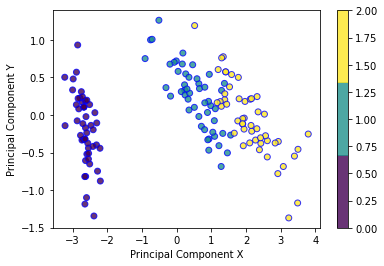

In [8]:
plt.scatter(x1, x2,c=y, edgecolor='blue',alpha=0.8,cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('Principal Component X')
plt.ylabel('Principal Component Y')
plt.colorbar()
plt.show()

In [9]:
pca = PCA(n_components=1)
pca.fit(x)
X_pca = pca.transform(x)
print("original shape:   ", x.shape)
print("transformed shape:", X_pca.shape)


original shape:    (150, 4)
transformed shape: (150, 1)


#### -----------============-------------------------============-------------------------

## References : 

Principal component analysis (PCA) is a technique to bring out strong patterns in a dataset by supressing variations. It is used to clean data sets to make it easy to explore and analyse. The algorithm of Principal Component Analysis is based on a few mathematical ideas namely:

    Variance and Convariance
    Eigen Vectors and Eigen values

We will explain the two topics in simple terms in the steps below so that you can follow along and learn enough to implement your own Principal Component Analysis code in any language.

Algorithm steps
Step 1: Get your data

Separate your data set into Y and X. Y will be the validation set and X will be the training set. In simple terms, we will use X for our study and use Y to check whether our study is correct.
Step 2: Give your data a structure

Take the 2 dimensional matrix of independent variables X. Rows represent data items and columns represent features. The number of columns is the number of dimensions.

For each column, subtract the mean of that column from each entry. (This ensures that each column has a mean of zero.)
Step 3: Standardize your data

Given the columns of X, are features with higher variance more important than features with lower variance, or is the importance of features independent of the variance? (In this case, importance means how well that feature predicts Y.)

If the importance of features is independent of the variance of the features, then divide each observation in a column by that column’s standard deviation. Call the centered and standardized matrix Z.
Step 4: Get Covariance of Z

Take the matrix Z, transpose it and multiply the transposed matrix by Z.

Convariance of Z = ZᵀZ

The resulting matrix is the covariance matrix of Z, up to a constant.
Step 5: Calculate Eigen Vectors and Eigen Values

Calculate the eigenvectors and their corresponding eigenvalues of ZᵀZ.

The eigendecomposition of ZᵀZ is where we decompose ZᵀZ into PDP⁻¹,

where P is the matrix of eigenvectors
D is the diagonal matrix with eigenvalues on the diagonal and values of zero everywhere else.

The eigenvalues on the diagonal of D will be associated with the corresponding column in P — that is, the first element of D is λ₁ and the corresponding eigenvector is the first column of P. This holds for all elements in D and their corresponding eigenvectors in P. We will always be able to calculate PDP⁻¹ in this fashion.
Step 6: Sort the Eigen Vectors

Take the eigenvalues λ₁, λ₂, …, λp and sort them from largest to smallest. In doing so, sort the eigenvectors in P accordingly. (For example, if λ3 is the largest eigenvalue, then take the third column of P and place it in the first column position.)

Call this sorted matrix of eigenvectors P*. The columns of P* are the same as the columns of P in a different order. Note that these eigenvectors are independent of one another.
Step 7: Calculate the new features

Calculate Z* = ZP*.

This new matrix, Z*, is a centered/standardized version of X but now each observation is a combination of the original variables, where the weights are determined by the eigenvector. As a bonus, because our eigenvectors in P* are independent of one another, each column of Z* is also independent of one another.
Step 8: Drop unimportant features from the new set

We need to determine which features from the new set we wish to keep for further study.

Side note: As each eigenvalue is roughly the importance of its corresponding eigenvector, the proportion of variance explained is the sum of the eigenvalues of the features you kept divided by the sum of the eigenvalues of all features.

There are three common methods to do this:

Method 1: Arbitrarily select how many dimensions we want to keep

Method 2: Calculate the proportion of variance for each feature, pick a threshold, and add features until you hit that threshold

Method 3: Calculate the proportion of variance for each feature, sort features by proportion of variance and plot the cumulative proportion of variance explained as you keep more features. One can pick how many features to include by identifying the point where adding a new feature has a significant drop in variance explained relative to the previous feature, and choosing features up until that point.

https://towardsdatascience.com/dimensionality-reduction-with-pca-from-basic-ideas-to-full-derivation-37921e13cae7